In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data 
train_images = train_images.reshape((train_images.shape[0], 32 * 32 * 3)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 32 * 32 * 3)) / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Function to create MLP model with variable depth
def create_mlp_model(depth=1):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))  # Flattened input
    for _ in range(depth):
        model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


depths = [1, 3, 5, 10]
history_dict = {}  

# Train and evaluate models
for depth in depths:
    print(f"\nTraining MLP model with {depth} layers...")
    model = create_mlp_model(depth)
    history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2, verbose=0)
    
    # Store the history for plotting
    history_dict[depth] = history.history
    
    # Evaluate the model on the test data
    test_loss, _ = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test loss for depth {depth}: {test_loss:.4f}")



Training MLP model with 1 layers...
Test loss for depth 1: 1.5350

Training MLP model with 3 layers...
Test loss for depth 3: 1.4685

Training MLP model with 5 layers...
Test loss for depth 5: 1.4854

Training MLP model with 10 layers...
Test loss for depth 10: 1.5570


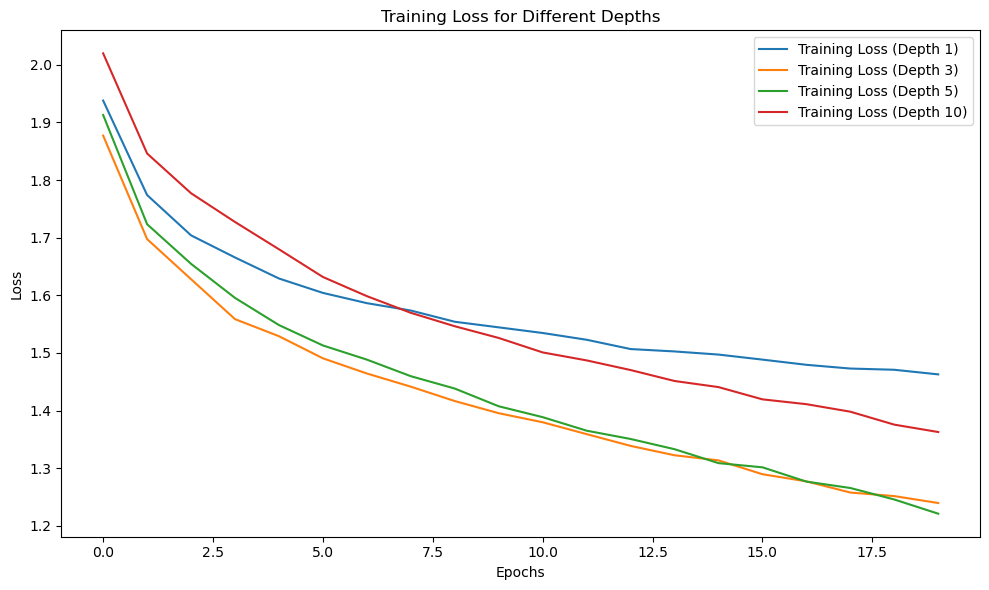

In [16]:
import matplotlib.pyplot as plt

# Plotting training loss for different depths
plt.figure(figsize=(10, 6))
for depth in history_dict:
    plt.plot(history_dict[depth]['loss'], label=f'Training Loss (Depth {depth})')


plt.title('Training Loss for Different Depths')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


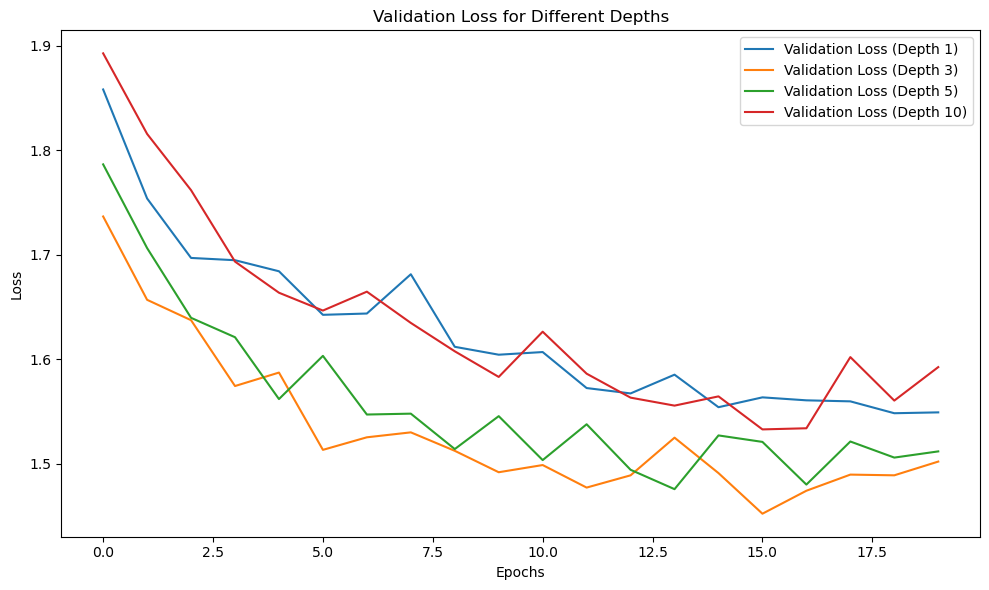

In [19]:
plt.figure(figsize=(10, 6))

for i, depth in enumerate(depths):
    plt.plot(history_dict[depth]['val_loss'], label=f'Validation Loss (Depth {depth})')

plt.title('Validation Loss for Different Depths')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training MLP without Dropout...
Test Loss for MLP without Dropout: 1.5144
Test Accuracy for MLP without Dropout: 0.4661

Training MLP with Dropout...
Test Loss for MLP with Dropout: 1.8815
Test Accuracy for MLP with Dropout: 0.2942


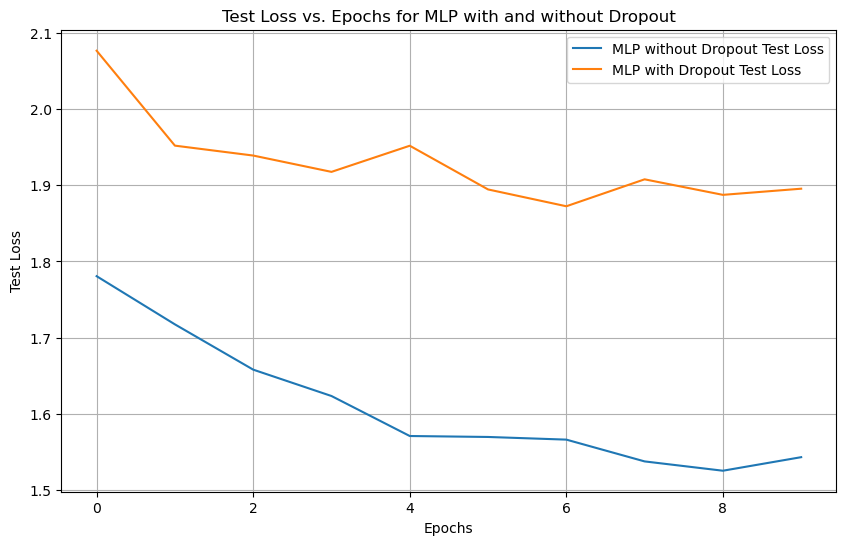

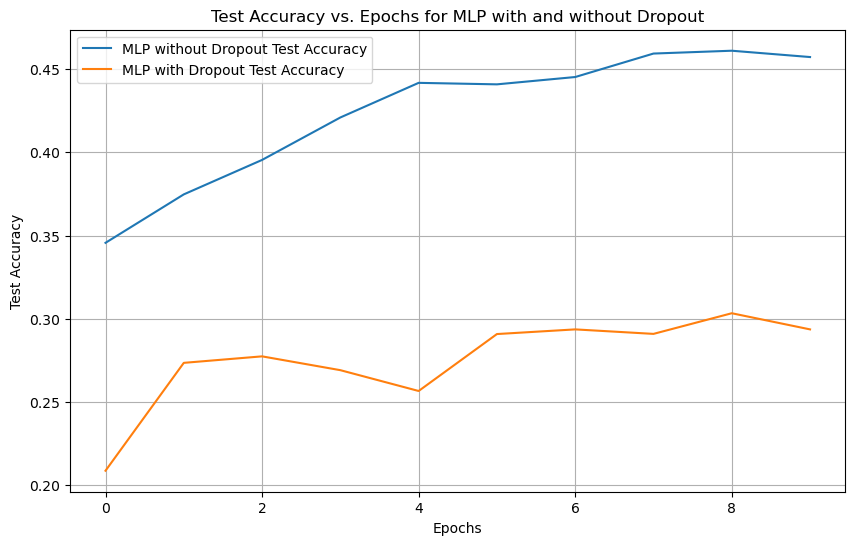

In [22]:
# Function to create MLP model without Dropout
def create_mlp_model_without_dropout():
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))  # Flattened input
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to create MLP model with Dropout
def create_mlp_model_with_dropout():
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(32 * 32 * 3,)))  # Flattened input
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.2))  # Dropout with rate of 0.5
    
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
models_to_train = {
    "MLP without Dropout": create_mlp_model_without_dropout(),
    "MLP with Dropout": create_mlp_model_with_dropout()
}

history_dict = {}

# Train both models
for model_name, model in models_to_train.items():
    print(f"\nTraining {model_name}...")
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
    history_dict[model_name] = history.history
    
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test Loss for {model_name}: {test_loss:.4f}")
    print(f"Test Accuracy for {model_name}: {test_accuracy:.4f}")

# Plotting Test Loss for both models
plt.figure(figsize=(10, 6))
for model_name, history in history_dict.items():
    plt.plot(history['val_loss'], label=f'{model_name} Test Loss')

plt.title('Test Loss vs. Epochs for MLP with and without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Test Accuracy for both models
plt.figure(figsize=(10, 6))
for model_name, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=f'{model_name} Test Accuracy')

plt.title('Test Accuracy vs. Epochs for MLP with and without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()
